In [1]:
import pandas as pd

df = pd.read_csv("online_retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [2]:
df.shape

(541909, 8)

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Description'] = df['Description'].fillna("Unknown")
df['CustomerID'] = df['CustomerID'].fillna(0)


In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(5268)

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11435.904653
std,219.130156,97.233118,6795.044250
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.080000,14336.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

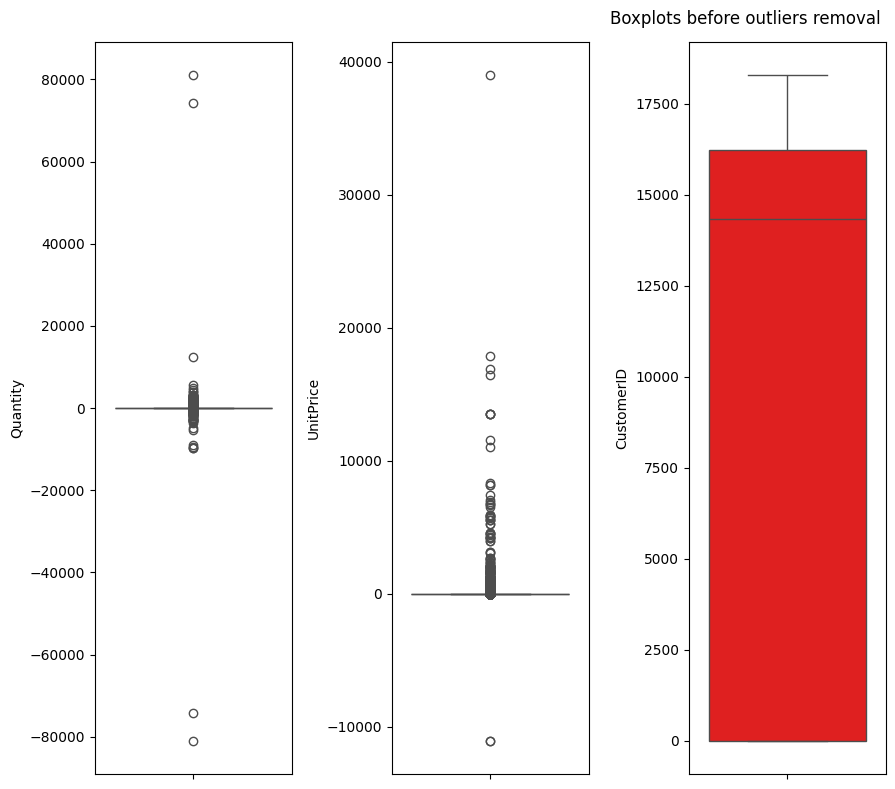

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 8))
plt.suptitle('Boxplots before outliers removal')
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='red',)
    plt.tight_layout()


In [14]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

C:\Users\sakth\AppData\Local\Temp\ipykernel_16852\904927823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
C:\Users\sakth\AppData\Local\Temp\ipykernel_16852\904927823.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
C:\Users\sakth\AppData\Local\Temp\ipykernel_16852\904927823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

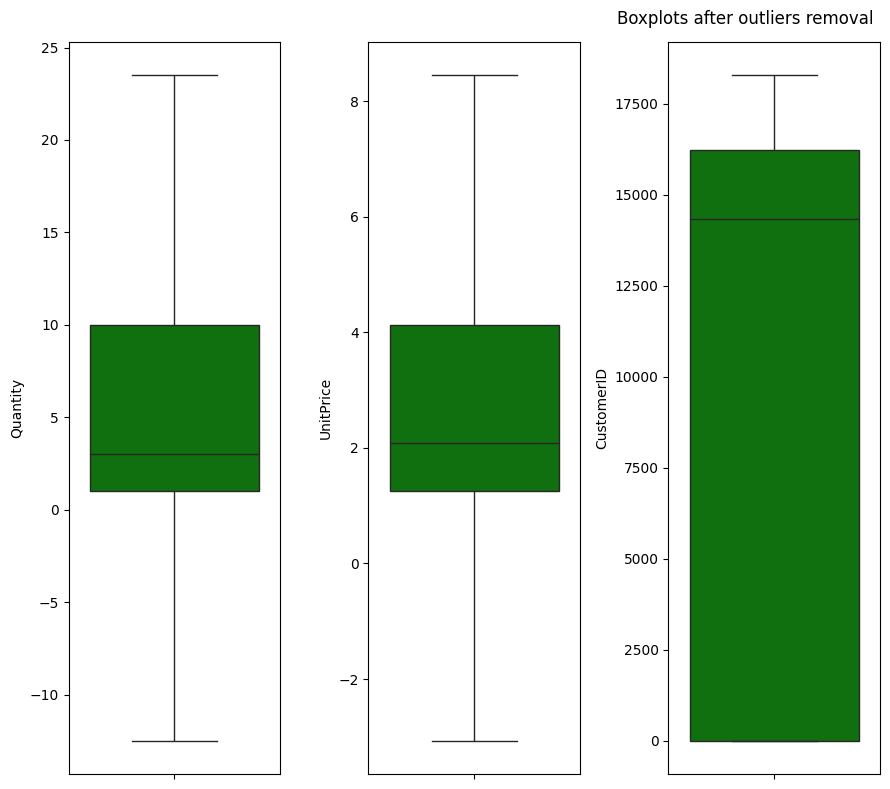

In [15]:
plt.figure(figsize=(15, 8))
plt.suptitle('Boxplots after outliers removal')
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='green',)
    plt.tight_layout()

DATA PREPROCESSING

In [16]:
#Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

#Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Reset index after cleaning
df = df.reset_index(drop=True)

In [17]:
df.shape

(524878, 8)

EXPLORATORY DATA ANALYSIS

ANALYZE TRANSACTION VOLUME BY COUNTRY

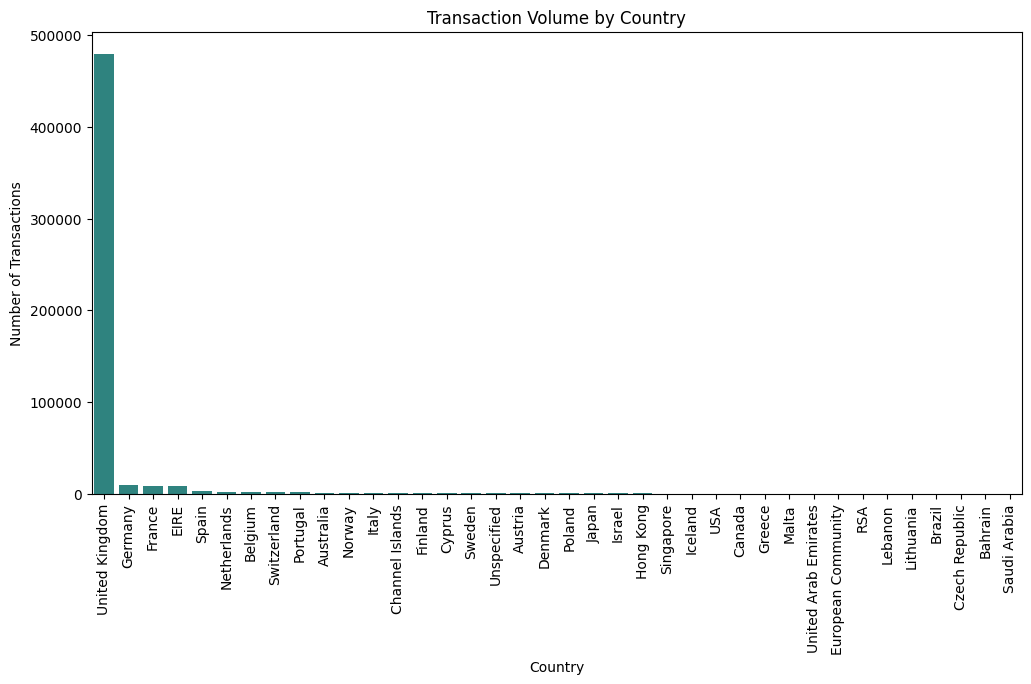

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count transactions per country
country_counts = df['Country'].value_counts()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis", hue=False, legend=False)
plt.xticks(rotation=90)
plt.title("Transaction Volume by Country")
plt.ylabel("Number of Transactions")
plt.show()


IDENTIFY TOP-SELLING PRODUCTS

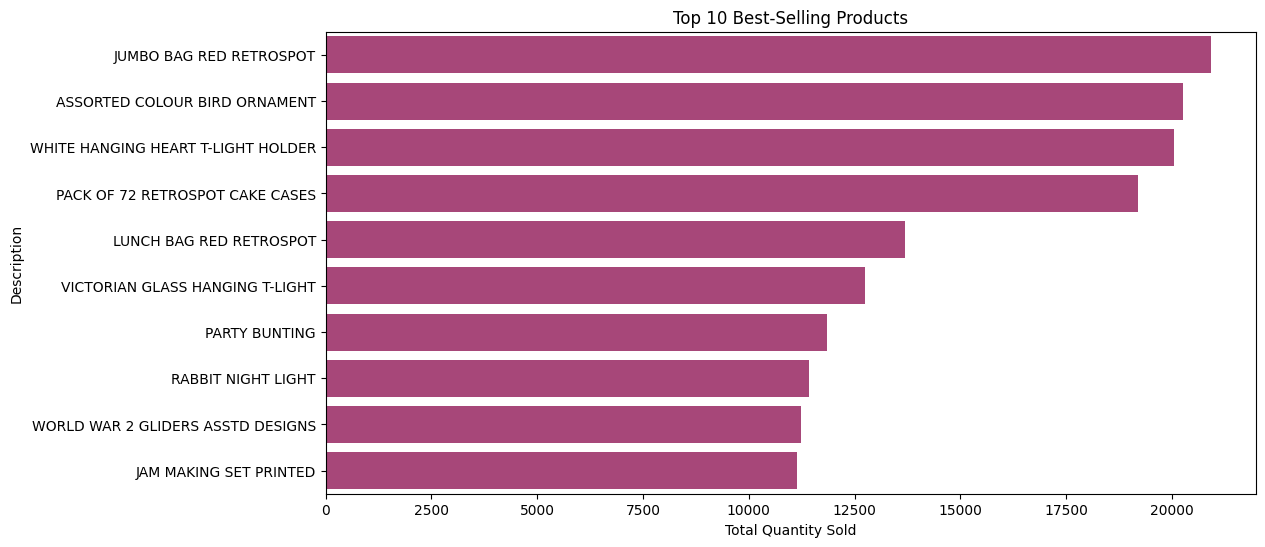

In [19]:
# Total quantity sold per product
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma", hue=False, legend=False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.show()


VISUALIZE PURCHASE TRENDS OVER TIME

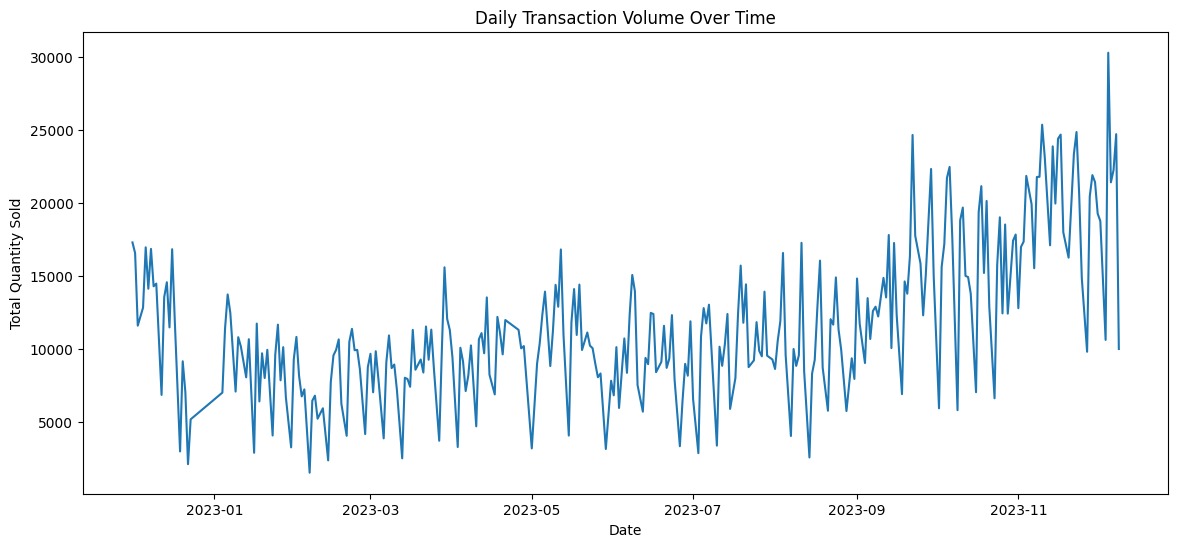

In [20]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by date
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum()

# Plot
plt.figure(figsize=(14,6))
daily_sales.plot()
plt.title("Daily Transaction Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.show()


INSPECT MONETARY DISTRIBUTION PER TRANSACTION AND CUSTOMER

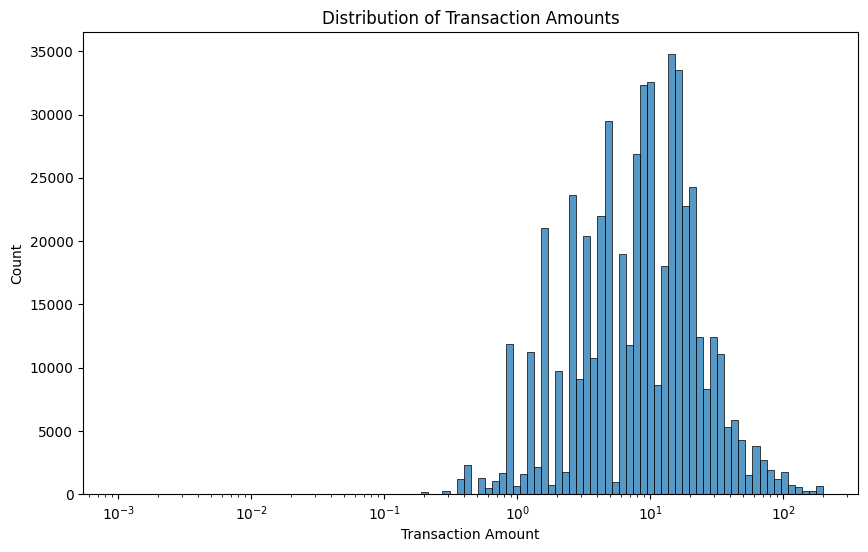

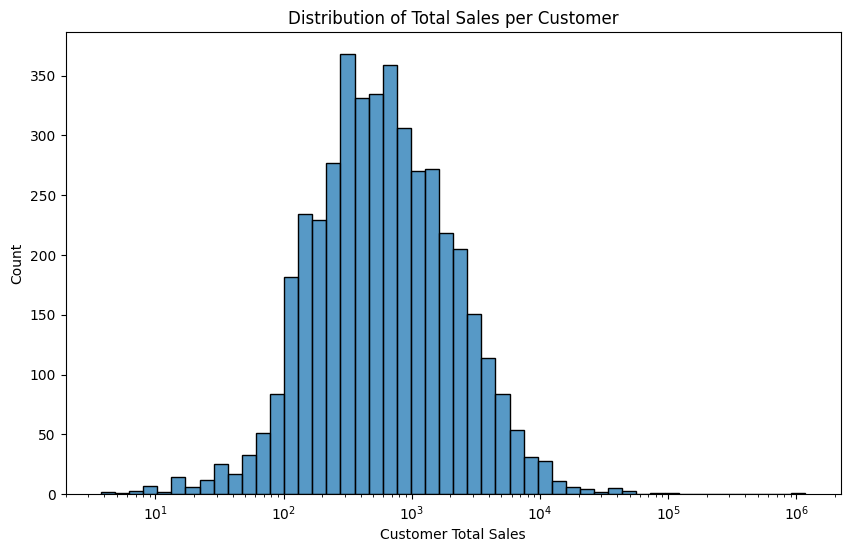

In [21]:
# Total price per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Distribution per transaction
plt.figure(figsize=(10,6))
sns.histplot(df['TotalPrice'], bins=100, log_scale=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()

# Total sales per customer
customer_sales = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,6))
sns.histplot(customer_sales, bins=50, log_scale=True)
plt.title("Distribution of Total Sales per Customer")
plt.xlabel("Customer Total Sales")
plt.show()


RFM DISTRIBUTIONS

In [22]:
import datetime as dt

# Latest date in dataset
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'})

# Preview
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
0.0,1,132186,1174953.060
12346.0,326,1,24.440
12347.0,2,182,3849.115
12348.0,75,31,512.760
12349.0,19,73,1355.615


ELBOW CURVE FOR CLUSTER SELECTION

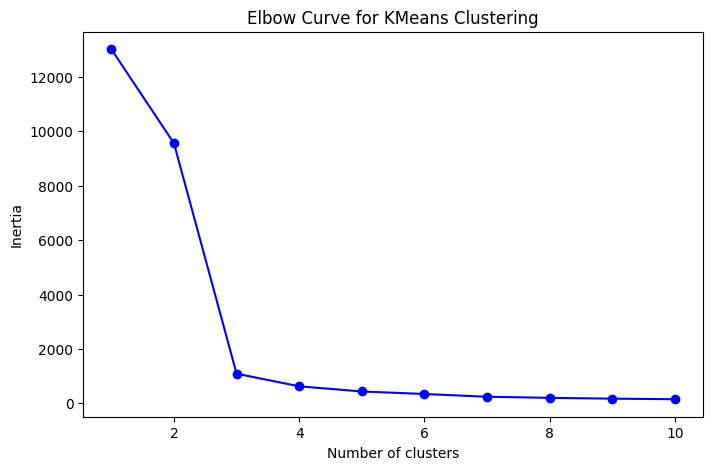

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Elbow method
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for KMeans Clustering')
plt.show()


CUSTOMER CLUSTER PROFILES

In [24]:
# Choose number of clusters (example: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cluster summary
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'Cluster':'count'
}).rename(columns={'Cluster':'NumCustomers'})

cluster_summary

,Recency,Frequency,Monetary,NumCustomers
Cluster,,,,
0,31.957182,119.239296,1.798334e+03,2896
1,294.431310,23.325879,3.302760e+02,626
2,1.000000,132186.000000,1.174953e+06,1
3,152.648284,40.162990,5.759268e+02,816


PRODUCT RECOMMENDATION HEATMAP / SIMILARITY MATRIX

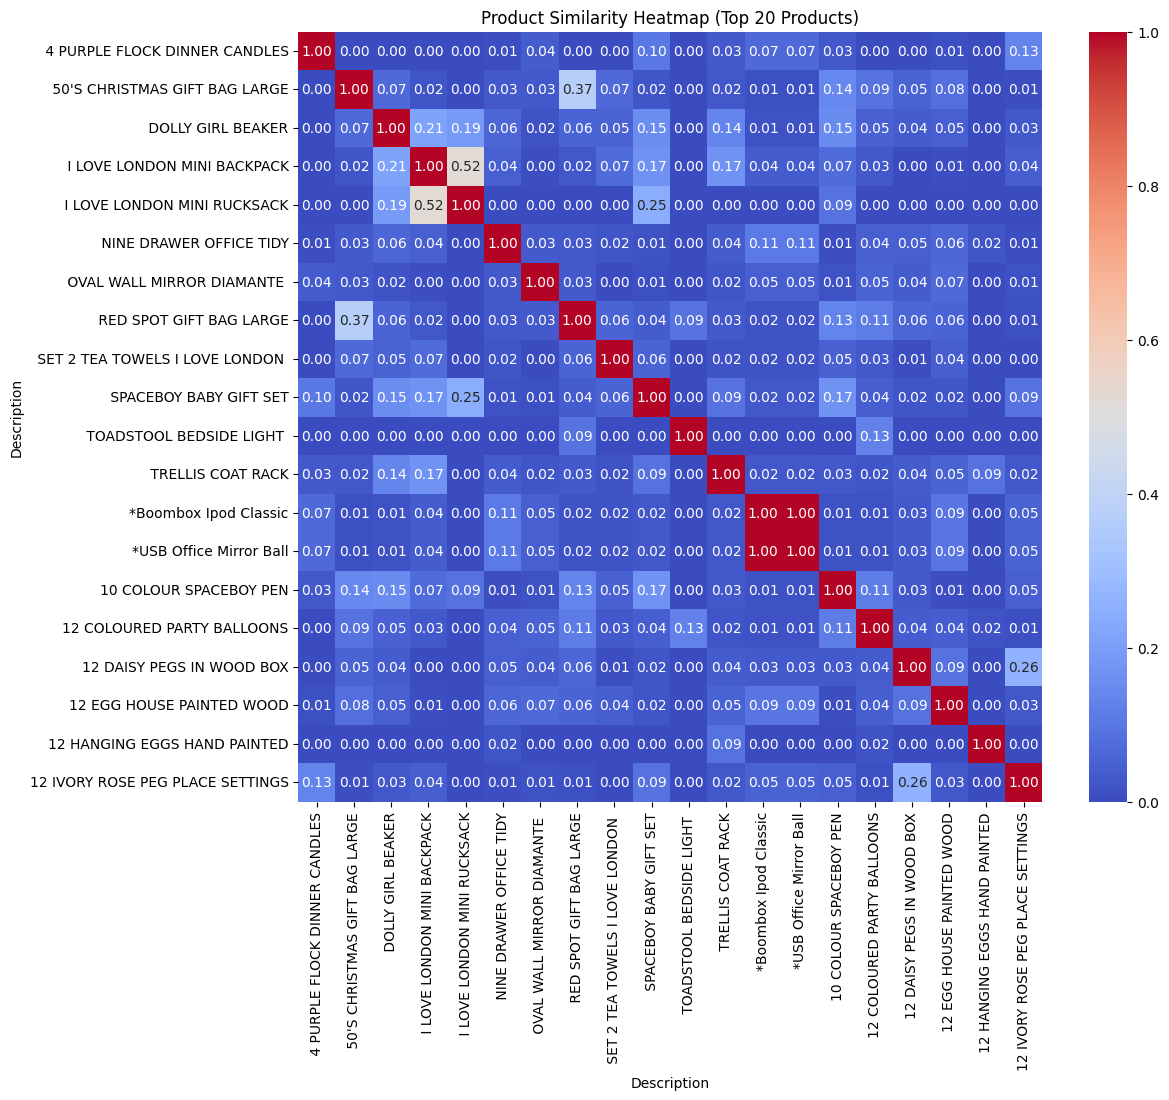

In [25]:
# Create product-customer pivot table
product_matrix = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)

# Cosine similarity between products
from sklearn.metrics.pairwise import cosine_similarity
product_similarity = cosine_similarity(product_matrix.T)

# Convert to DataFrame
similarity_df = pd.DataFrame(product_similarity, index=product_matrix.columns, columns=product_matrix.columns)

# Heatmap of top 20 products for clarity
plt.figure(figsize=(12,10))
sns.heatmap(similarity_df.iloc[:20, :20], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Product Similarity Heatmap (Top 20 Products)")
plt.show()


CLUSTERING METHODOLOGY

FEATURE ENGINEERING: CALCULATE RFM

In [26]:
import pandas as pd
import datetime as dt

# Assuming df is already cleaned
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Snapshot date = 1 day after the latest invoice
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                     # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'})

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
0.0,1,132186,1174953.060
12346.0,326,1,24.440
12347.0,2,182,3849.115
12348.0,75,31,512.760
12349.0,19,73,1355.615


STANDARDIZE/NORMALIZE RFM VALUES

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Convert back to DataFrame for convenience
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)


DECIDE NUMBER OF CLUSTERS (ELBOW METHOD & SILHOUETTE SCORE)

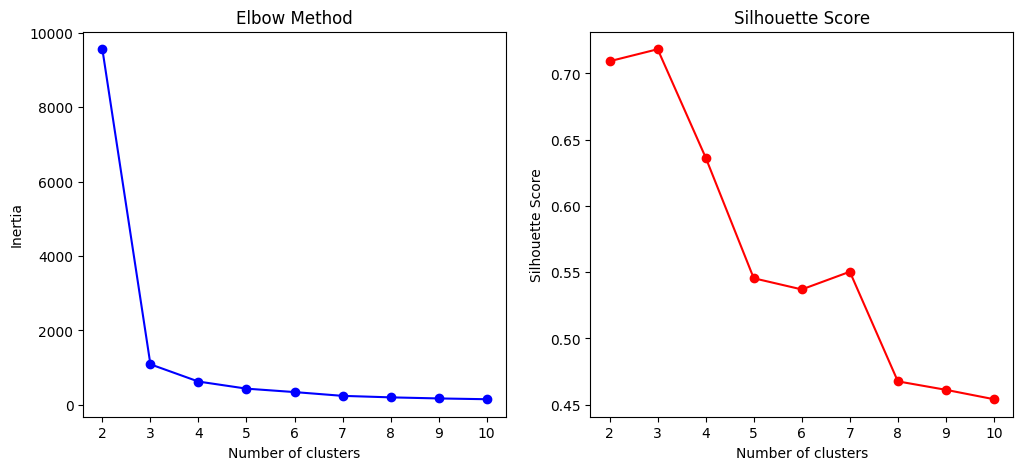

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K = range(2,11)  # Try 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(rfm_scaled_df, kmeans.labels_)
    silhouette.append(score)

# Plot Elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


RUN CLUSTERING

In [29]:
# Suppose we choose k=4 based on Elbow & Silhouette
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Cluster Profiles
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'Cluster':'count'
}).rename(columns={'Cluster':'NumCustomers'})

print(cluster_summary)


            Recency      Frequency      Monetary  NumCustomers
Cluster                                                       
0         31.957182     119.239296  1.798334e+03          2896
1        294.431310      23.325879  3.302760e+02           626
2          1.000000  132186.000000  1.174953e+06             1
3        152.648284      40.162990  5.759268e+02           816


In [30]:
# Calculate cluster-wise mean values
cluster_avg = rfm.groupby('Cluster').mean()
print(cluster_avg)

# Function to assign segment labels based on RFM characteristics
def label_cluster(row):
    if row['Recency'] <= cluster_avg['Recency'].median() and row['Frequency'] >= cluster_avg['Frequency'].median() and row['Monetary'] >= cluster_avg['Monetary'].median():
        return 'High-Value'
    elif row['Frequency'] >= cluster_avg['Frequency'].median() and row['Monetary'] >= cluster_avg['Monetary'].median():
        return 'Regular'
    elif row['Recency'] >= cluster_avg['Recency'].median() and row['Frequency'] <= cluster_avg['Frequency'].median() and row['Monetary'] <= cluster_avg['Monetary'].median():
        return 'At-Risk'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(label_cluster, axis=1)
rfm[['Recency','Frequency','Monetary','Cluster','Segment']].head()


            Recency      Frequency      Monetary
Cluster                                         
0         31.957182     119.239296  1.798334e+03
1        294.431310      23.325879  3.302760e+02
2          1.000000  132186.000000  1.174953e+06
3        152.648284      40.162990  5.759268e+02


,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
0.0,1,132186,1174953.060,2,High-Value
12346.0,326,1,24.440,1,At-Risk
12347.0,2,182,3849.115,0,High-Value
12348.0,75,31,512.760,0,Occasional
12349.0,19,73,1355.615,0,Occasional


VISUALIZE CLUSTERS (2D & 3D SCATTER PLOTS)

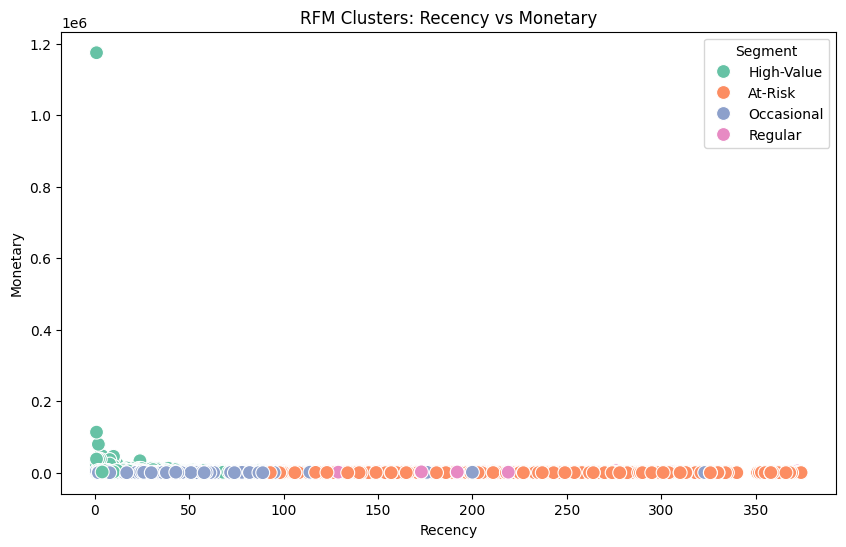

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2', s=100)
plt.title("RFM Clusters: Recency vs Monetary")
plt.show()


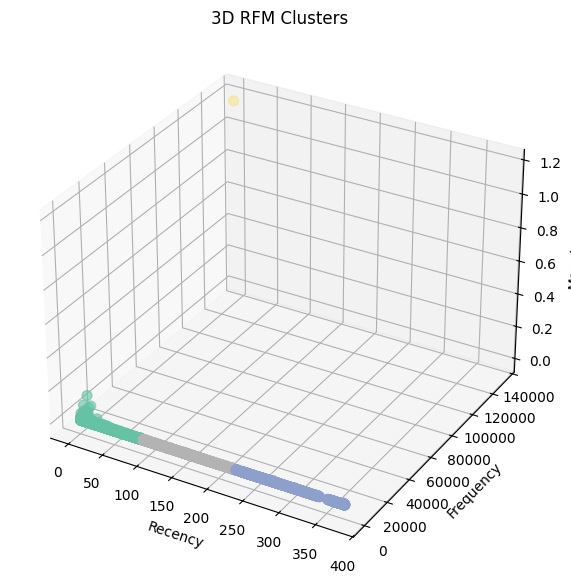

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
                     c=rfm['Cluster'], cmap='Set2', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Clusters')
plt.show()


In [33]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the scaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])
joblib.dump(scaler, "rfm_scaler.pkl")

# Save KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
joblib.dump(kmeans, "rfm_kmeans_model.pkl")

print("Scaler and KMeans model saved successfully!")


Scaler and KMeans model saved successfully!
